# **1. Dataset Overview**


I used [*Salary Prediction Classification*](https://www.kaggle.com/datasets/ayessa/salary-prediction-classification) dataset for this machine learning project. Although this data was already labeled (salary > 50k vs not), I'm not using the label for clustering exercise. The dataset size is 32,561 rows $\times$ 14 columns, containing numerical and categorical data.

# **2. Import Library**

These are some Python libraries i used to analyze and build the clustering model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils.utils import DataUtils
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import kagglehub
from sklearn.decomposition import PCA

# **3. Loading the Dataset**

In this step, the source dataset is loaded into the *notebook* and checked to give an overviem of the dataset.

In [2]:
# Download dataset last version
try:
    path = kagglehub.dataset_download("ayessa/salary-prediction-classification").replace('\\','/')
except Exception as e:
    print(e)
    # If there is error in kagglehub API
    path = "C:/Users/mohfi/.cache/kagglehub/datasets/ayessa/salary-prediction-classification/versions/1"

# Ekstract the data and load to a dataframe
salary_df = pd.read_csv(f"{path}/salary.csv")

In [3]:
# Remove unused column
dropped_columns = ['salary', 'education', 'fnlwgt']
dropped_df = salary_df[dropped_columns].copy()
salary_df = salary_df.drop(columns=dropped_columns)

# Remove change column names to snake_case
salary_df.columns = [str(col).replace('-', '_') for col in salary_df.columns]

# Preview data
print("Data shape: ", salary_df.shape)
salary_df.head()

Data shape:  (32561, 12)


,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [4]:
# Viewing summary of categorical data
selected_columns = salary_df.select_dtypes(include=['object']).columns
for col in selected_columns:
    print('-' * 20 + '\n' + col + '\n' + '-' * 20)
    print(salary_df[col].value_counts())


--------------------
workclass
--------------------
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
--------------------
marital_status
--------------------
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
--------------------
occupation
--------------------
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-sup

In [5]:
# Viewing summary of numerical data
salary_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [6]:
# Viewing the data types
salary_df.dtypes

age                int64
workclass         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

# **4. Exploratory Data Analysis (EDA)**

The objective of EDA is to get a deeper insights of the dataset and determine the decision for the data in the next step.

a. **Knowing the structure of the dataset**
   - Review the dataset shape (rows and columns)
   - Review the data types (numerical and categorical)
   - Identify abnormal data

b. **Handling duplicated and missing values**  
   - Identify and analyze duplicated and missing values

c. **Distribution and correlation analysis**  
   - Analyze numerical variables/features's distribution using descriptive statistics and visualization (histogram and boxplot)
   - Examine the relationship between features using correlation matrix, visualized with a correlation heat map and a pair plot

## a. Knowing the structure of the dataset

In [7]:
# Initialize DataUtils
u = DataUtils()

# Assess the dataset
u.asses_data(salary_df, 'salary')

Data Assessment for 'salary':
 > Data shape:  (32561, 12)
 > No column should be dropped v
 > All requirements columns are exists v
 > All column types match the requirements v
 > There is no missing value columns v
 > Duplicated data count:  6336


## b. Handling duplicated and missing values

In [8]:
# Deleting duplicated data
salary_df = salary_df.drop_duplicates()

# Deleting data with missing values
salary_df = salary_df.dropna()

# Re-assess the data
u.asses_data(salary_df, 'salary')

Data Assessment for 'salary':
 > Data shape:  (28492, 12)
 > No column should be dropped v
 > All requirements columns are exists v
 > All column types match the requirements v
 > There is no missing value columns v
 > There is no duplicated data v


## c. Distribution and correlation analysis

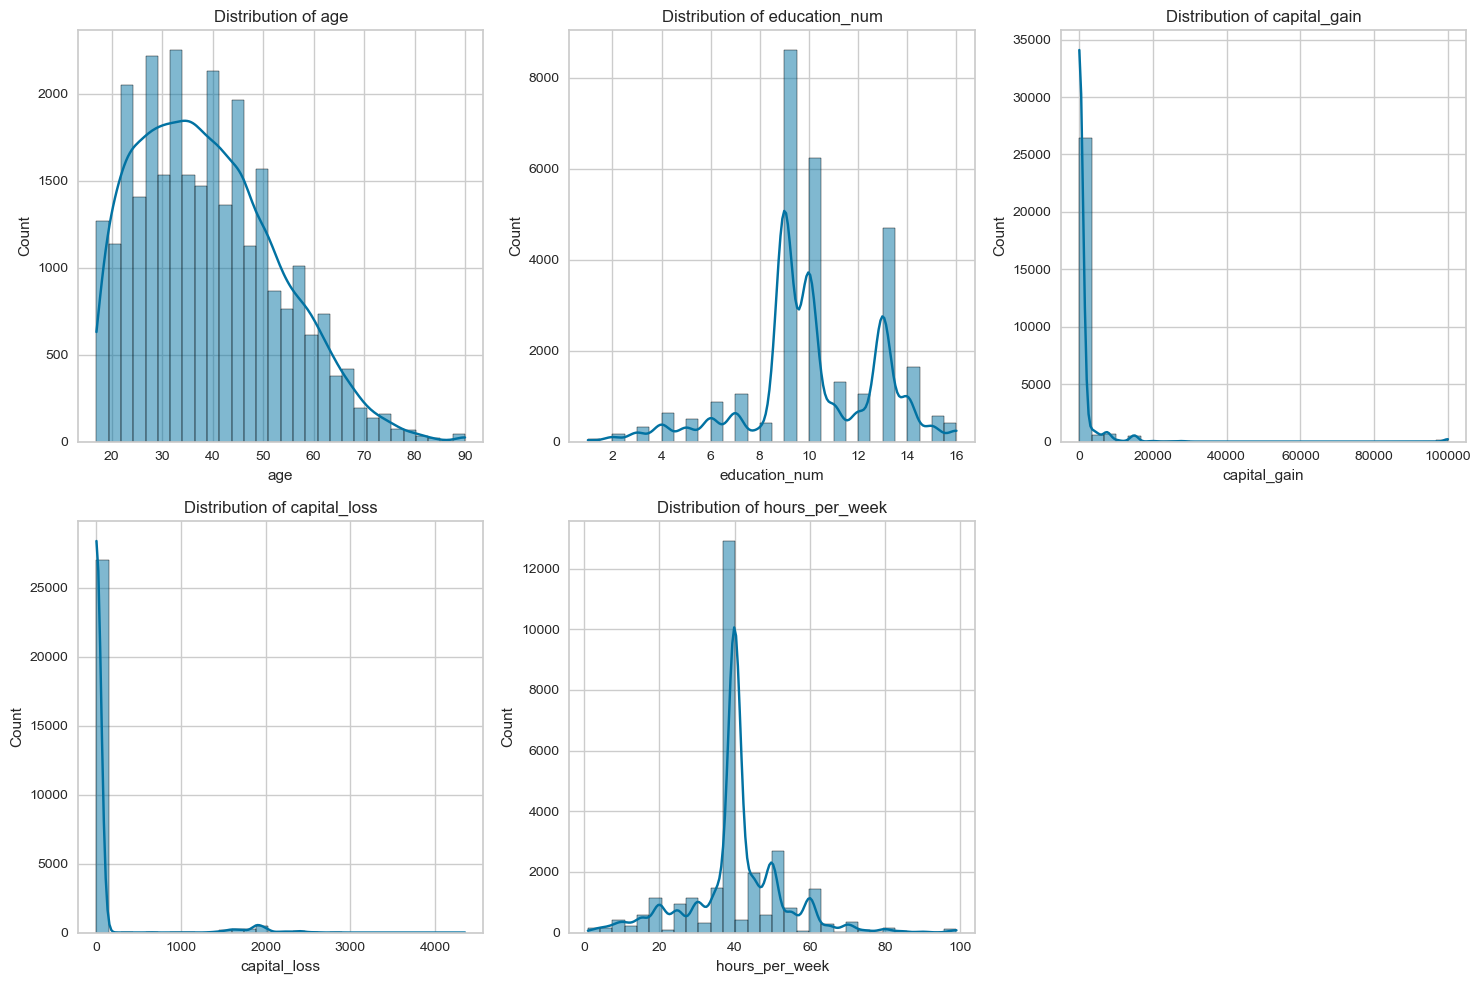

In [ ]:
# Creating histogram plot for numerical data
plt.figure(figsize=(15, 10))
for i, column_ in enumerate(
    salary_df.select_dtypes(include=['int64', 'float64']), 1):
    plt.subplot(2, 3, i)
    sns.histplot(salary_df[column_], kde=True, bins=30)
    plt.title(f'Distribution of {column_}')
 
plt.tight_layout()
plt.show()

It seems that there is an unusual pattern in  *capital_gain* & *capital_loss* feature

In [10]:
# Identify unique values in capital_gain (with percentage)
(salary_df['capital_gain'].value_counts() / salary_df.shape[0]).reset_index().head()

,index,capital_gain
0,0,0.905307
1,15024,0.011968
2,7688,0.009827
3,7298,0.008564
4,99999,0.005545


In [11]:
# Identify unique values in capital_loss (with percentage)
(salary_df['capital_loss'].value_counts() / salary_df.shape[0]).reset_index().head()

,index,capital_loss
0,0,0.946968
1,1902,0.007090
2,1977,0.005826
3,1887,0.005510
4,1485,0.001790


As the feature contains a lot of 'zero' values (> 90%), these features are dropped to avoid hindering the performance of the model.

In [12]:
salary_df = salary_df.drop(columns=['capital_gain', 'capital_loss'])

In the next step, I create a heatmap of correlation matriz

C:\Users\mohfi\AppData\Local\Temp\ipykernel_16288\3532840888.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = salary_df.corr()


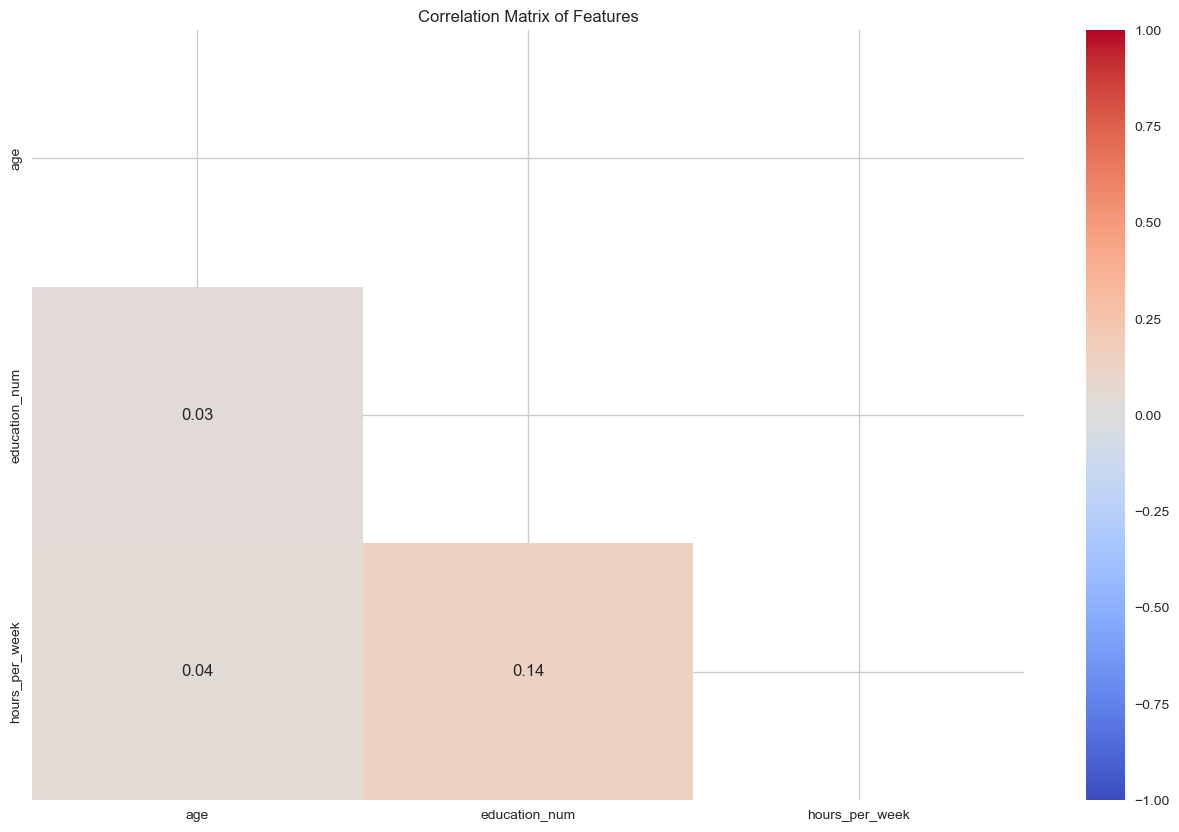

In [13]:
# Create a heatmap correlation matrix
correlation_matrix = salary_df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')
plt.show()

We see that correlation between features are too low (~0), indicating no positive or negative relationship. To visualize this low relationsip between features, I use pair plot.

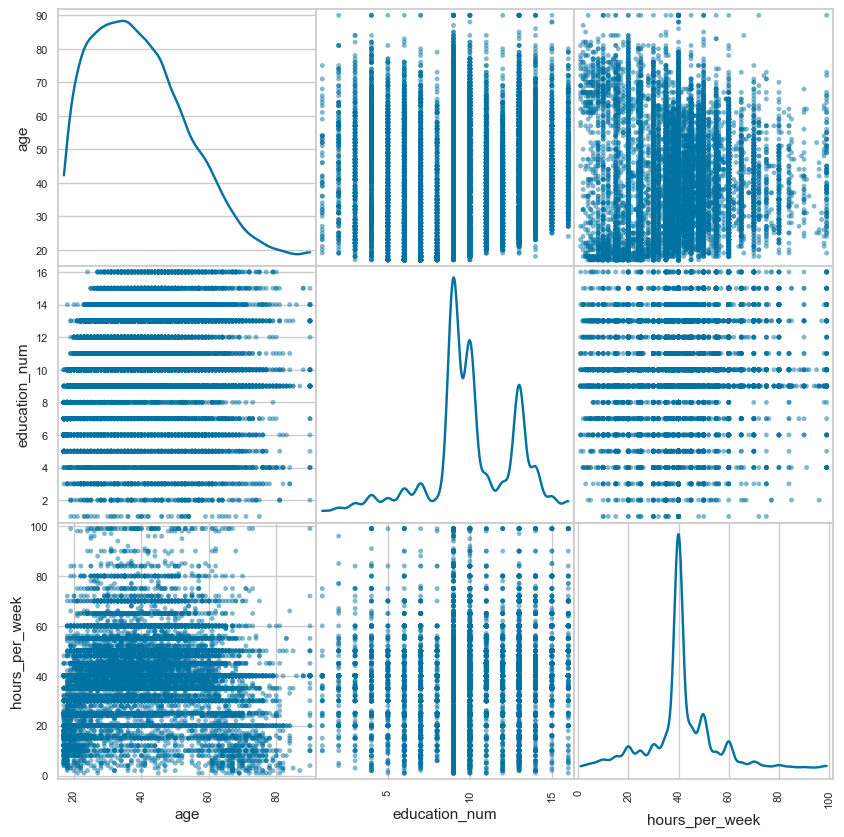

In [14]:
# Membuat pair plot
pd.plotting.scatter_matrix(salary_df, figsize=(10, 10), diagonal='kde')
plt.show()

We see that the dataset have no apparent positive/negative relationship. However, we can look at some fuzzy clusters in the age vs hours_per_week plot. It is maybe a hint that these features are essentials for the clustering model.

# **5. Data Preprocessing**

In the data preprocessing step, we want to ensure the data quality before we proceed to build the clustering model. We have to get rid of duplicated and missing values (already done in the previous step), abnormality, different ranges, and outliers that can potentially hinder the performance of the model. These are the steps for data processing.

*a. Removing and handling missing values **(done)***


*b. Removing duplicated data **(done)***


c. Transforming the data


d. Feature normalization/standardization


e. Outlier detection and handling


f. Encoding the categorical data

g. Binning the data

h. Principal Component Analysis (PCA)

### c. Transforming the data

Before doing the standardization, I transformed the skewed data (age) so they become more 'normal'.

In [15]:
for col in ['age']:
    # Transform using log transformation
    salary_df[f"log_{col}"] = np.log(salary_df[col] + 1)

## d. Feature standardization

Standardization is important to ensure that all features in the dataset have the same scale, making it easier for the model to learn better and provide more accurate and stable results.

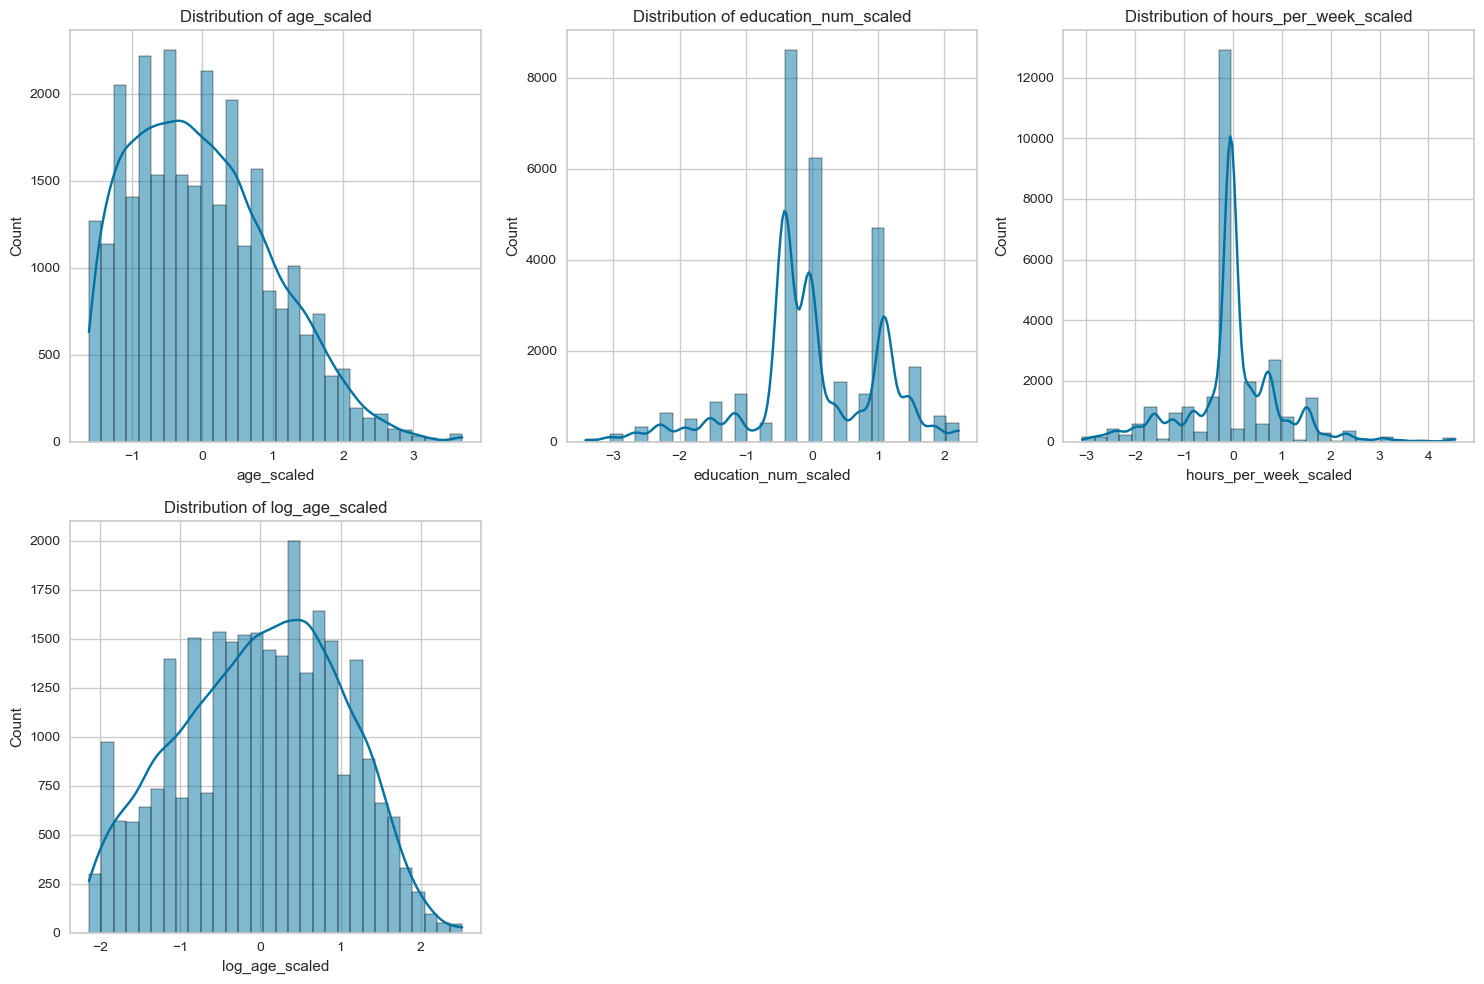

In [16]:
# Standardization of numerical features
scaler = StandardScaler()

# Create a histogram plot for numerical data
plt.figure(figsize=(15, 10))
for i, column_ in enumerate(salary_df.select_dtypes(include=['int64','float64']), 1):
    plt.subplot(2, 3, i)
    numeric_data = salary_df[column_].values.reshape(-1, 1) # Reshape 1D array to 2D 
    salary_df[f'{column_}_scaled'] = scaler.fit_transform(numeric_data) # Standardize the feature
    sns.histplot(salary_df[f'{column_}_scaled'], kde=True, bins=30)
    plt.title(f'Distribution of {column_}_scaled')
 
plt.tight_layout()
plt.show()

We can see that the 'age' feature become more 'normal' asfter transformations.

In [17]:
# Removing age_scaled data because it is not used anymore
salary_df = salary_df.drop(columns=['age_scaled'])

## e. Outlier detection and handling

In this analysis, detected outliers will be trimmed (capping) based on the 5% and 95% percentiles. IQR boundary capping is not used because too much data will be trimmed and could remove the characteristics of a feature.

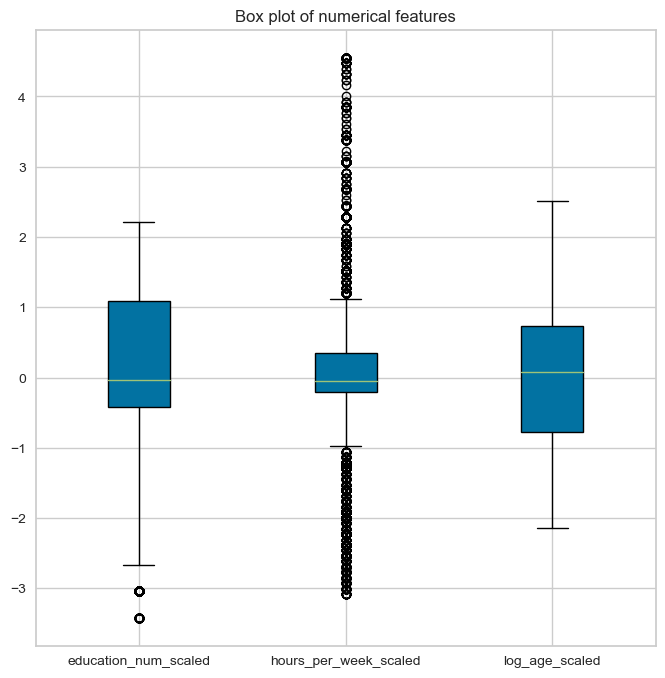

In [18]:
# Detect the outliers visually using box plot
# Display the result in boxplot
fig, axs = plt.subplots(1, 1, figsize=(8, 8))

df = salary_df.select_dtypes(include=['float64'])
df = df.drop(labels=[col for col in df.columns if 'scaled' not in col], axis=1)

axs.boxplot(
    df.values,
    patch_artist=True,
    labels=df.columns
)
axs.set_title(f'Box plot of numerical features')

plt.show()


In [19]:
# Cap the outliers
def cap_outliers(df: pd.DataFrame, feature: str, percentile: int):
    # Doing the capping
    lower_bound = df[feature].quantile(percentile)
    upper_bound = df[feature].quantile(1-percentile) 

    # Uncomment the following codes to use interquartile boundary capping
    # Q1 = df[feature].quantile(0.25)
    # Q3 = df[feature].quantile(0.75)
    # IQR = Q3 - Q1
    # lower_bound = Q1 - 1.5 * IQR 
    # upper_bound = Q3 + 1.5 * IQR

    df[feature] = df[feature].clip(lower=lower_bound, upper=upper_bound)

    return df

for feature in ['hours_per_week_scaled']:
    salary_df = cap_outliers(salary_df, feature, 0.05)


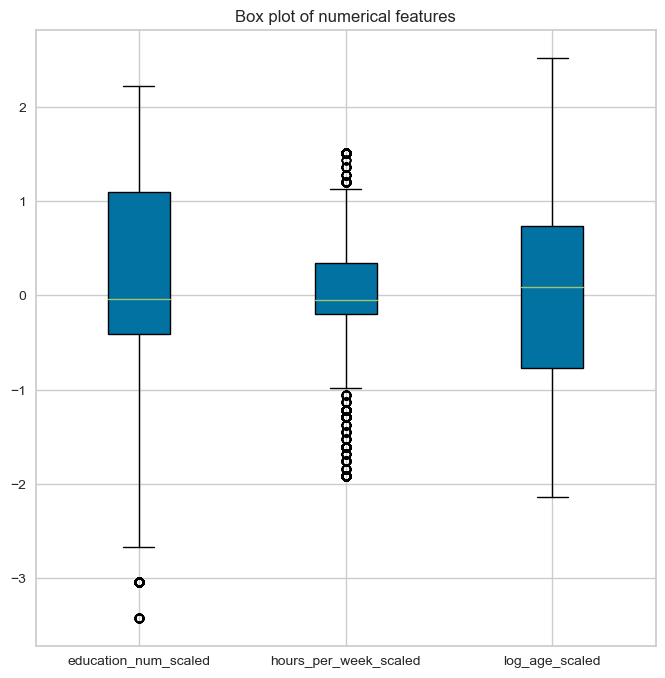

In [20]:
# Detect the outliers visually using box plot
# Display the result in boxplot
fig, axs = plt.subplots(1, 1, figsize=(8, 8))

df = salary_df.select_dtypes(include=['float64'])
df = df.drop(labels=[col for col in df.columns if 'scaled' not in col], axis=1)

axs.boxplot(
    df.values,
    patch_artist=True,
    labels=df.columns
)
axs.set_title(f'Box plot of numerical features')

plt.show()

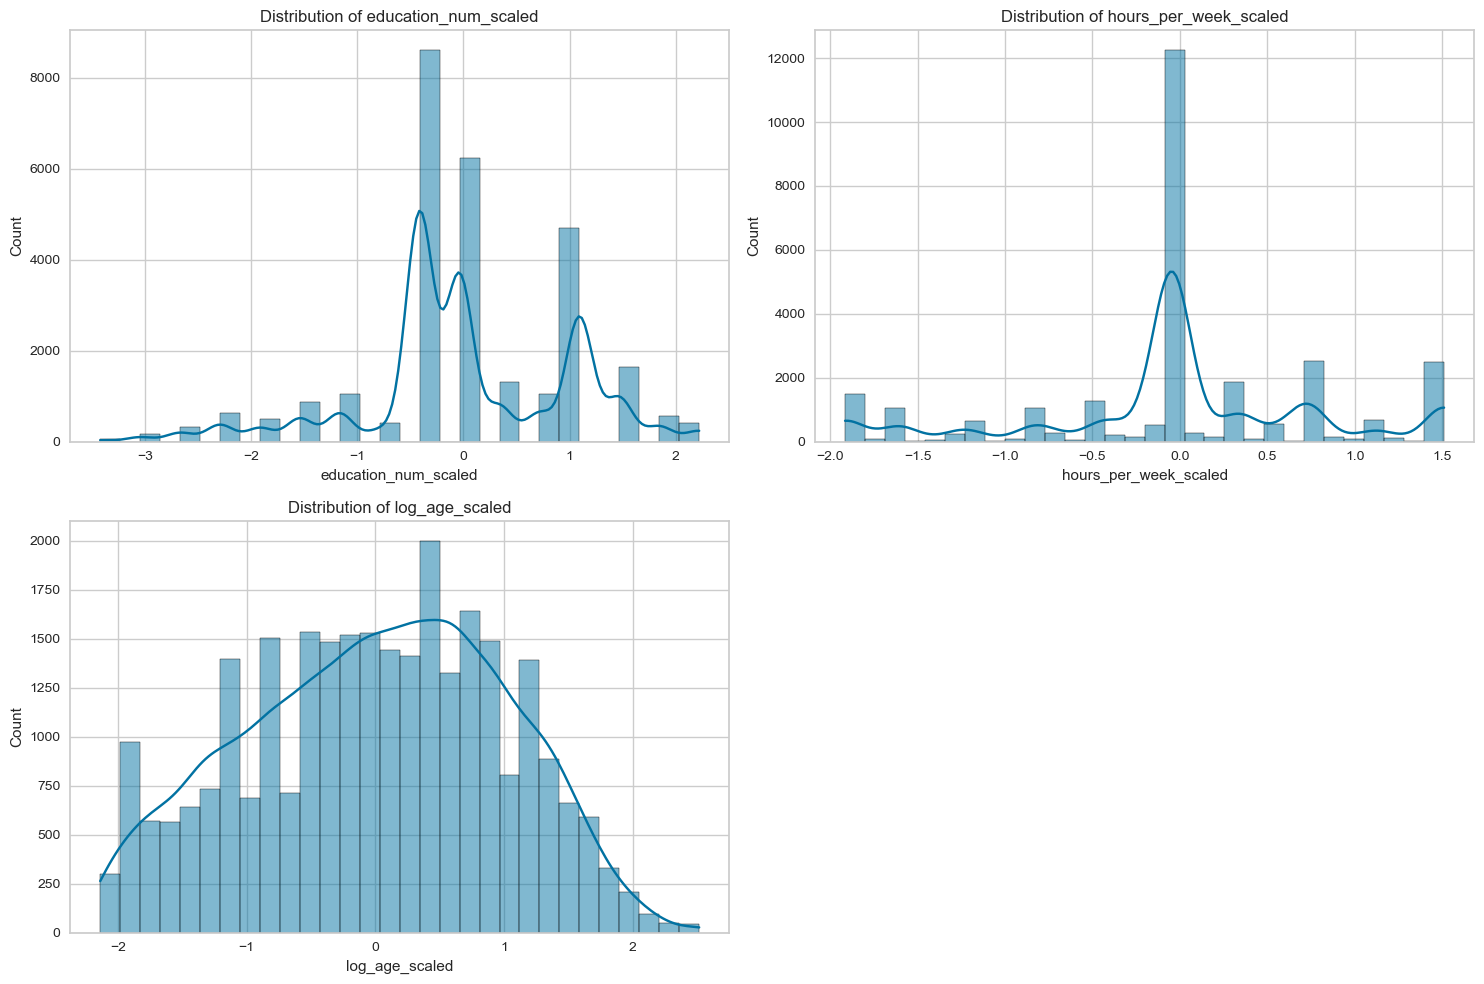

In [21]:
# Create a histogram plot for numerical data
plt.figure(figsize=(15, 10))
selected_columns = salary_df.select_dtypes(include=['float64']).columns
selected_columns = [col for col in selected_columns if 'scaled' in col]

for i, column_ in enumerate(selected_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(salary_df[column_], kde=True, bins=30)
    plt.title(f'Distribution of {column_}')
 
plt.tight_layout()
plt.show()

It appears that this outlier capping affects the log_age_scaled data, which should have "tails" tapering off at the extreme right and extreme left, making them "protruding".

## f. Encoding Data
Encoding data is the process of converting categorical features into numerical ones. In this case, the one-hot encoding method is used.

In [22]:
# List of categorical columns
categorical_columns = salary_df.select_dtypes(include='object').columns

In [23]:
# Viewing the summary of categorical data
for col in categorical_columns:
    print('-' * 20 + '\n' + col + '\n' + '-' * 20)
    print(salary_df[col].value_counts().sort_values(ascending=False) / salary_df.shape[0])

--------------------
workclass
--------------------
 Private             0.670504
 Self-emp-not-inc    0.086059
 Local-gov           0.070616
 ?                   0.056788
 State-gov           0.044398
 Self-emp-inc        0.037940
 Federal-gov         0.032957
 Without-pay         0.000491
 Never-worked        0.000246
Name: workclass, dtype: float64
--------------------
marital_status
--------------------
 Married-civ-spouse       0.445318
 Never-married            0.320967
 Divorced                 0.148217
 Separated                0.035589
 Widowed                  0.034431
 Married-spouse-absent    0.014671
 Married-AF-spouse        0.000807
Name: marital_status, dtype: float64
--------------------
occupation
--------------------
 Prof-specialty       0.133652
 Exec-managerial      0.126878
 Adm-clerical         0.115752
 Sales                0.111189
 Craft-repair         0.111189
 Other-service        0.104872
 Machine-op-inspct    0.058086
 ?                    0.057034
 Trans

In [24]:
# Encode the categorical columns
salary_df = pd.get_dummies(salary_df, columns=categorical_columns)

## g. Binning Data

Binning data is used to group continuous data into intervals or bins. The benefits are that it can reduce noise, make visualization and interpretation easier, and improve efficiency.

In [25]:
# Binning the age & hours per week features into 5 levels
def binner(df: pd.DataFrame, column: str, bins: list):
    df[f'{column}_level'] = pd.cut(df[column], bins=bins, labels=[f" {i}" for i in range(len(bins) - 1)])
    return df

bin_array = {
    'age': [0, 25, 35, 45, 55, 100],
    'hours_per_week': [0, 20, 40, 60, 80, 100]
}

for col in ['age', 'hours_per_week']:
    salary_df = binner(salary_df, col, bin_array[col])


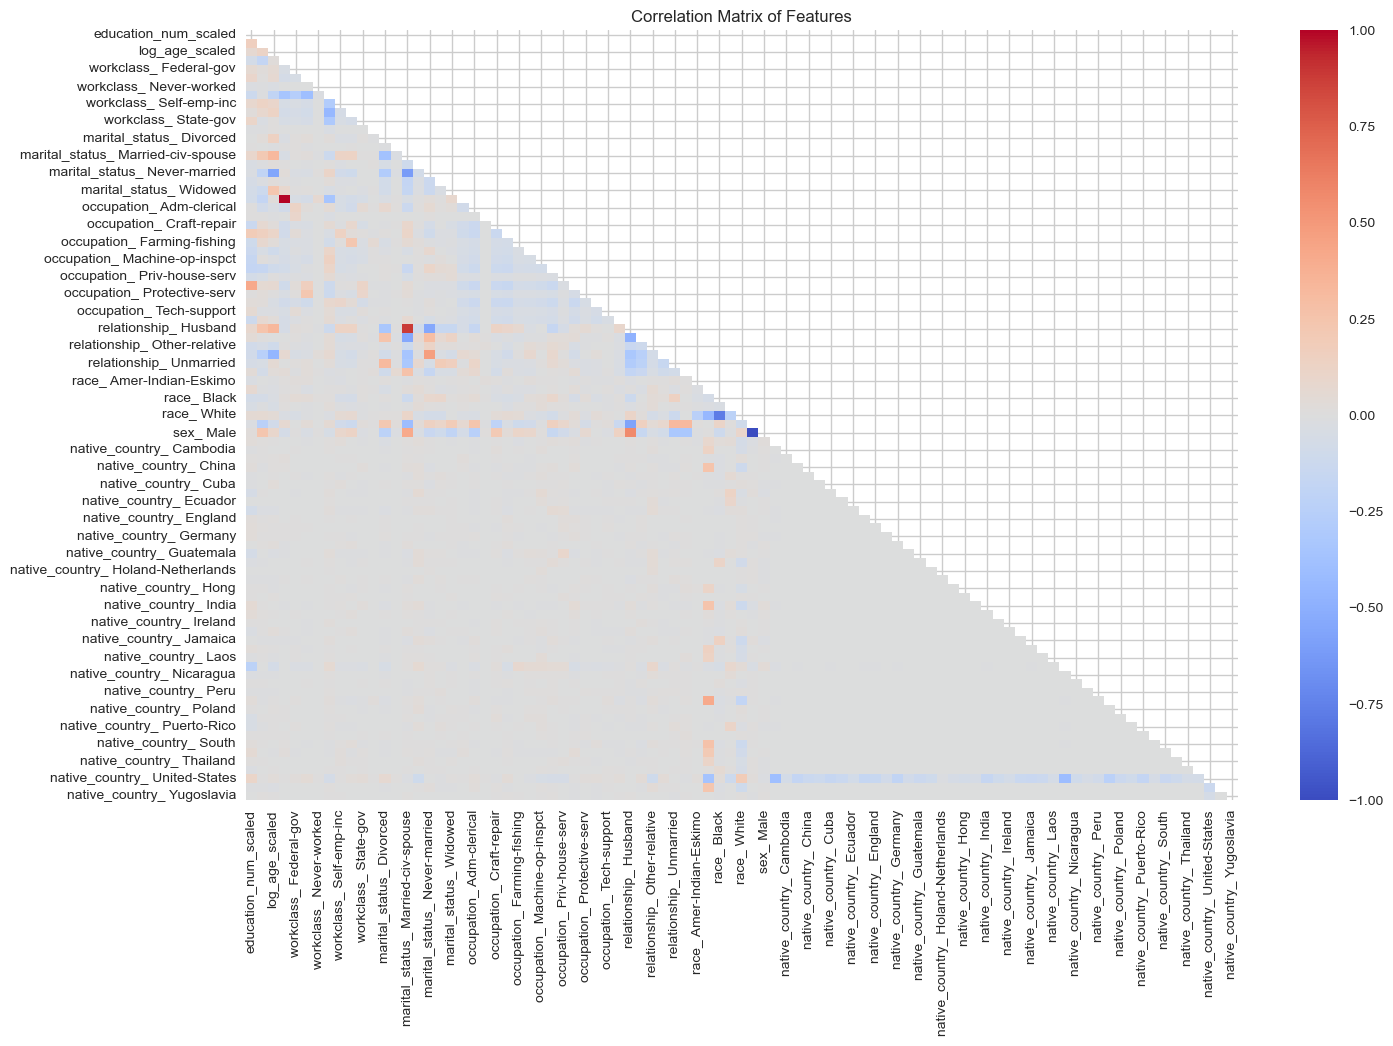

In [26]:
# Create a heatmap correlation matrix
correlation_matrix = salary_df[[col for col in salary_df.columns if ('scaled' in col) | ('_ ' in col)]].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')
plt.show()

Dari hasil korelasi matriks ini, bisa dilihat terdapat beberapa fitur yang berkorelasi positif dan negatif. Namun karena fitur sangat banyak, maka dilakukan pengurangan dimensi menggunakan PCA agar model machine learning bisa dilakukan efisien.

## h. Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is one of the techniques used to reduce the number of dimensions that are too many.

In [27]:
# Filter columns with scaled, level
analysis_df = salary_df[[col for col in salary_df.columns if ('scaled' in col) | ('level' in col) | ('_ ' in col)]]
features = analysis_df.columns
print('Features: ', features)

Features:  Index(['education_num_scaled', 'hours_per_week_scaled', 'log_age_scaled',
       'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'marital_status_ Divorced', 'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'occupation_ ?', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occ

In [28]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(analysis_df)

In [29]:
# Creating a separate dataframe to store PCA result
pca = PCA(n_components=2)  # Choose the number of components
pca_result = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])


In [30]:
# Overview of PCA result
print('PCA Component 1 Ratio of Explained Variance')
print(f"{pca.explained_variance_ratio_[0]:.2%}")
print('PCA Component 2 Ratio of Explained Variance')
print(f"{pca.explained_variance_ratio_[1]:.2%}")
print('Total Explained Variance')
print(f"{pca.explained_variance_ratio_.sum():.2%}")


PCA Component 1 Ratio of Explained Variance
5.19%
PCA Component 2 Ratio of Explained Variance
3.22%
Total Explained Variance
8.41%


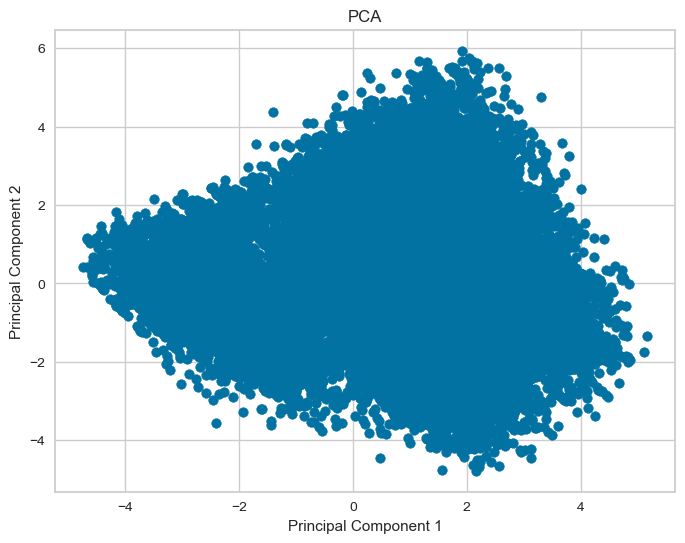

In [31]:
# Visualize the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.show()

From the visualization of the PCA results above, it can be seen that there are "2 clusters" of data which will later be systematically grouped using the K-Means algorithm.

# **6. Building Clustering Model**

## **a. Building Clustering Model**

At this stage, I build a clustering model by selecting an appropriate algorithm to group data based on similarities. Here are the **recommended** steps:
1. Choose an appropriate clustering algorithm.
2. Train the model with the data using the selected algorithm.

In [32]:
# Define the features (X)
X = pca_df

In [33]:
# Initialize KMeans model with default parameters
kmeans = KMeans()

## **b. Clustering Model Evaluation**

To determine the optimal number of clusters in a clustering model, you can use the Elbow or Silhouette Score methods.

These methods help us find the number of clusters that provide the best separation between data groups, making the built model more effective. Here are the **recommended** steps:
1. Use the Silhouette Score and Elbow Method to determine the optimal number of clusters.
2. Calculate the Silhouette Score as a measure of cluster quality.

c:\Users\mohfi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mohfi\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\mohfi\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\mohfi\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^

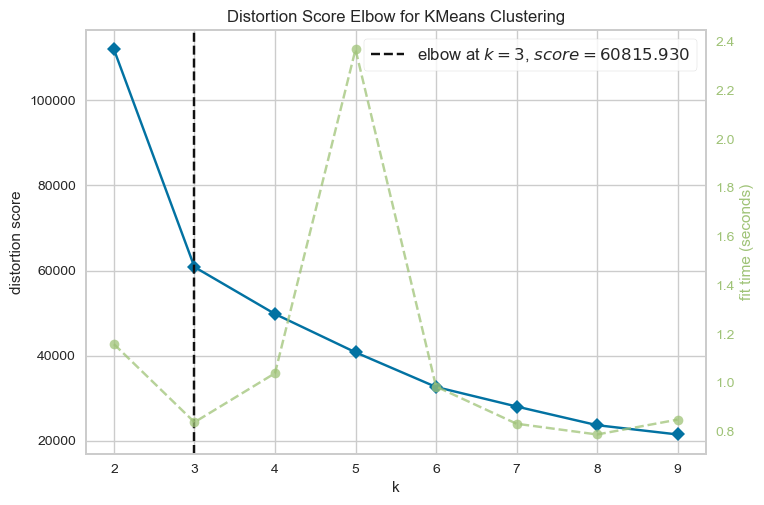

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
# Initialize visualizer KElbow to determine optimal cluster number
visualizer = KElbowVisualizer(kmeans, k=(2, 10))
 
# Fit using the features
visualizer.fit(X)
 
# Show the graph
visualizer.show()

c:\Users\mohfi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mohfi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mohfi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mohfi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

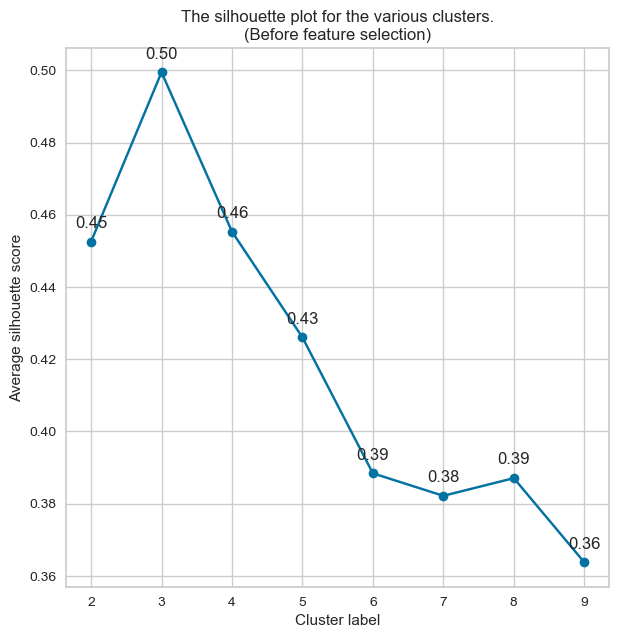

In [35]:
# Visualize the model evaluation using sillhouette score
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(7, 7)

silhouette_scores = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=10)
    cluster_labels = kmeans.fit_predict(X)
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

ax1.plot(range(2, 10), silhouette_scores, marker='o')
ax1.set_title("The silhouette plot for the various clusters.\n(Before feature selection)")
ax1.set_ylabel("Average silhouette score")
ax1.set_xlabel("Cluster label")
for i, score in enumerate(silhouette_scores, start=2): 
    ax1.annotate(f'{score:.2f}', (i, score), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

Based on the *elbow score* and *silhouette score* graphs, the following is the optimal cluster division:

- n = 3; ES = 56842; SS = 0.50 (elbow point)

Although the clustering created is quite good, due to the very low variance explained by PCA (8.32%), most random variables cannot be explained by this model.

If you have any more requests or need further assistance, feel free to ask!

## **c. Feature Selection**

- Drop Features with High Multicollinearity

Dropping features with high multicollinearity to avoid redundancy

In [36]:
# Define the correlation limit 
limit = 0.8
high_correlated_columns = []

# List the features with high multicollinearity
for col in correlation_matrix:
    list_ = []
    temp_list = [[col, key, val] for key, val in correlation_matrix.loc[col].to_dict().items() if abs(val) > 0.9]
    temp_list = [x for x in temp_list if x[0] != x[1]]
    if len(temp_list) > 0:
        high_correlated_columns.extend(temp_list)

print(f"Berikut kolom yang saling mempunyai korelasi tinggi (>|{limit}|)")
for x in high_correlated_columns:
    print(x)

Berikut kolom yang saling mempunyai korelasi tinggi (>|0.8|)
['workclass_ ?', 'occupation_ ?', 0.9977138642563048]
['occupation_ ?', 'workclass_ ?', 0.9977138642563048]
['sex_ Female', 'sex_ Male', -0.9999999999999999]
['sex_ Male', 'sex_ Female', -0.9999999999999999]


Based on the plot, there are some features that are too highly correlated, so one of them must be removed to prevent redundancy. Here are the columns to be removed:
- *workclass_ ?*
- *sex_ Female*


In [37]:
# Select features
analysis_df = salary_df[[col for col in salary_df.columns if ('scaled' in col) | ('level' in col) | ('_ ' in col)]]
analysis_df = analysis_df.drop(columns=['workclass_ ?', 'sex_ Female'])

- Drop Features with (Near-)Zero Variance

Features with very low or near-zero variance are features whose values hardly change across the entire dataset. In other words, these features do not have much variation and do not provide much useful information for the model.

In [38]:
# Setting the variance limit
limit = 0.23
features = analysis_df.var()[analysis_df.var() / analysis_df.max() > limit].index
print(f"Fitur yang dipertahankan\n{features}")
print(f"Fitur yang didrop\n{analysis_df.var()[analysis_df.var() / analysis_df.max() <= limit].index}")

Fitur yang dipertahankan
Index(['education_num_scaled', 'hours_per_week_scaled', 'log_age_scaled',
       'marital_status_ Married-civ-spouse', 'relationship_ Husband'],
      dtype='object')
Fitur yang didrop
Index(['workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'marital_status_ Divorced', 'marital_status_ Married-AF-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'occupation_ ?', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupat

C:\Users\mohfi\AppData\Local\Temp\ipykernel_16288\3988853425.py:3: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  features = analysis_df.var()[analysis_df.var() / analysis_df.max() > limit].index
C:\Users\mohfi\AppData\Local\Temp\ipykernel_16288\3988853425.py:3: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  features = analysis_df.var()[analysis_df.var() / analysis_df.max() > limit].index
C:\Users\mohfi\AppData\Local\Temp\ipykernel_16288\3988853425.py:5: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. 

In [39]:
# Select features
analysis_df = analysis_df[features]

## **d. Executing PCA again**

In [40]:
# Executing PCA operation again
scaler = StandardScaler()
scaled_data = scaler.fit_transform(analysis_df)

pca = PCA(n_components=2)  # Choose the number of components
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

In [41]:
# Overview of PCA result
print('PCA Component 1 Ratio of Explained Variance')
print(f"{pca.explained_variance_ratio_[0]:.2%}")
print('PCA Component 2 Ratio of Explained Variance')
print(f"{pca.explained_variance_ratio_[1]:.2%}")
print('Total Explained Variance')
print(f"{pca.explained_variance_ratio_.sum():.2%}")

PCA Component 1 Ratio of Explained Variance
44.30%
PCA Component 2 Ratio of Explained Variance
21.01%
Total Explained Variance
65.31%


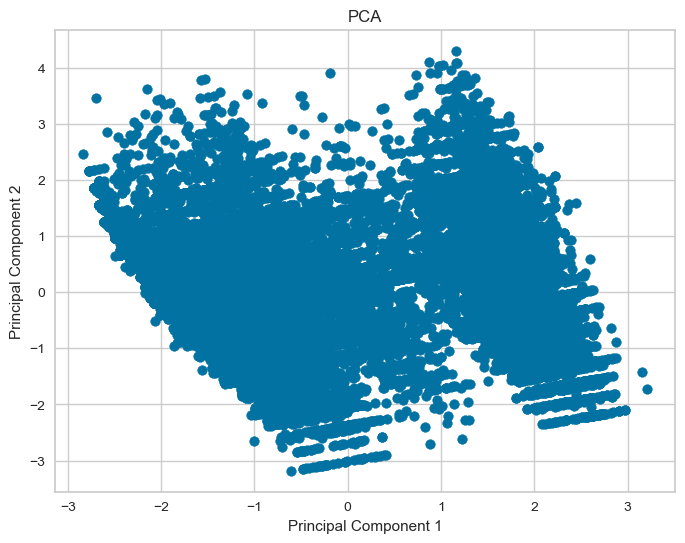

In [42]:
# Visualize the PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.show()

It can be seen that after feature selection, the separation of various "groups" becomes more apparent. Additionally, the percentage of random variables that can be explained by this model also increases significantly, to around 65%.

## **e. Rebuilding the Clustering Model**

In [43]:
# Select features
X = pca_df

In [44]:
# Initialize KMeans model with default parameter
kmeans = KMeans()

## **f. Reevaluate the Clustering Model**

c:\Users\mohfi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mohfi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mohfi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mohfi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

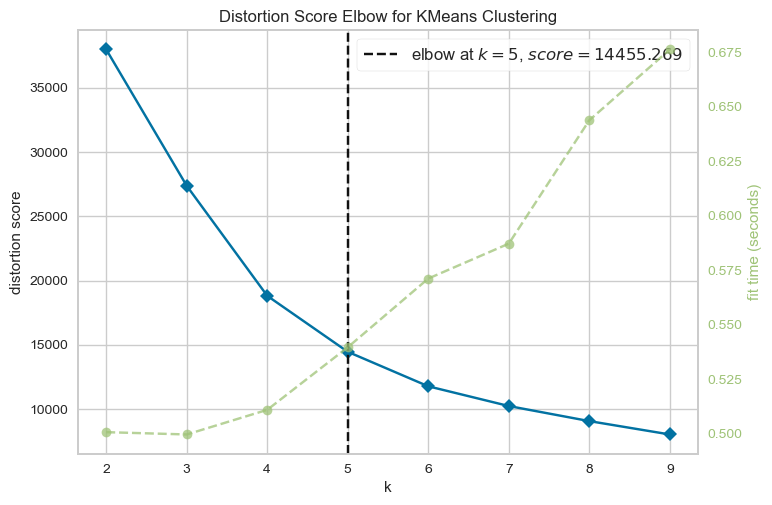

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
# Initialize visualizer KElbow to determine optimal cluster number
visualizer = KElbowVisualizer(kmeans, k=(2, 10))
 
# Fit using the features
visualizer.fit(X)
 
# Show the graph
visualizer.show()

c:\Users\mohfi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mohfi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mohfi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mohfi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

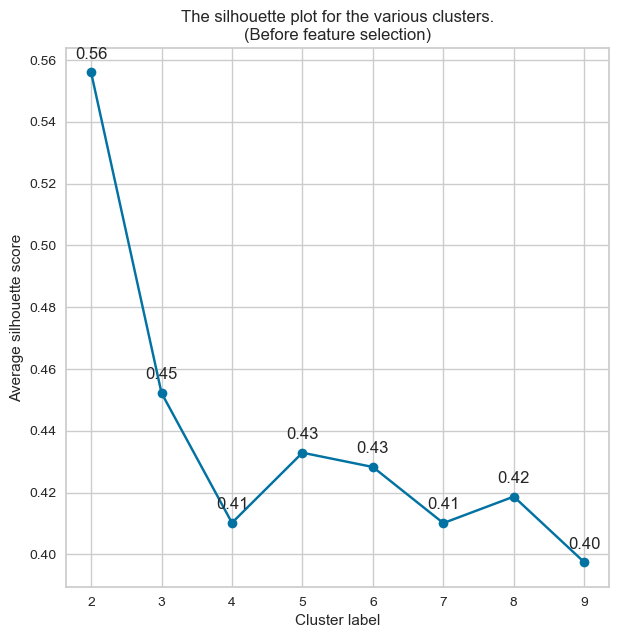

In [46]:
# Visualize the model evaluation using sillhouette score
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(7, 7)

silhouette_scores = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=10)
    cluster_labels = kmeans.fit_predict(X)
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

ax1.plot(range(2, 10), silhouette_scores, marker='o')
ax1.set_title("The silhouette plot for the various clusters.\n(Before feature selection)")
ax1.set_ylabel("Average silhouette score")
ax1.set_xlabel("Cluster label")
for i, score in enumerate(silhouette_scores, start=2): 
    ax1.annotate(f'{score:.2f}', (i, score), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

Based on the *elbow score* and *silhouette score* graphs, the following is the optimal cluster division:

- n = 2; ES = 37970; SS = 0.56 (elbow point)

This result is quite good, especially since this PCA model can explain about 65% of the random variables, so we proceed to the next stage.

In [47]:
kmeans = KMeans(n_clusters=2, random_state=10)
cluster_labels = kmeans.fit_predict(X)
pca_df['cluster'] = cluster_labels

c:\Users\mohfi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## **g. Visualizing Clustering Result**

After the clustering model is trained and the optimal number of clusters is determined, the next step is to display the clustering results through visualization.

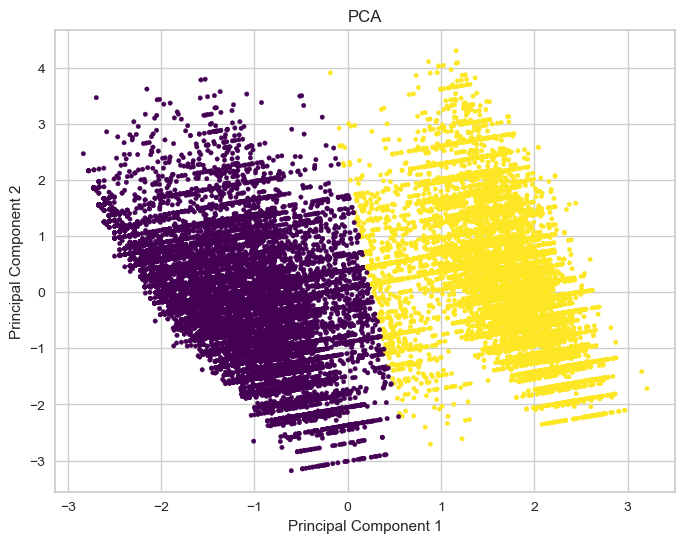

In [64]:
# Visualize the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['cluster'], cmap='viridis', s=10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.show()

It appears that there are indeed 2 clusters in this data. Next, an analysis will be carried out to interpret these groupings.

## **e. Analyze and Interprete the Clustering Result**

After performing clustering, the next step is to analyze the characteristics of each cluster based on the available features.

First, I join analysis_df with dropped_df to get 'education' label

In [49]:
# Cut dropped_df based on filtered index in analysis_df
dropped_df = dropped_df.iloc[analysis_df.index]

In [50]:
# Ensure the length of dataframes the same
if dropped_df.shape[0] == analysis_df.shape[0]:
    # Join the columns
    analysis_df['education'] = dropped_df['education']

Next, I join analysis_df with salary_df to get binning result of age and hours_per_week features

In [51]:
# Ensure the length of dataframes the same
if salary_df.shape[0] == analysis_df.shape[0]:
    # Join the columns
    for col in ['age_level', 'hours_per_week_level']:
        analysis_df[col] = salary_df[col]

To make it easier to interpret, I change the binning label with more interpretable names

In [52]:
# View bin array
print(bin_array)

{'age': [0, 25, 35, 45, 55, 100], 'hours_per_week': [0, 20, 40, 60, 80, 100]}


In [53]:
# Create labels
bin_labels = {
    'age_level': ['Remaja-Dewasa Awal', 'Dewasa Muda', 'Dewasa Tengah', 'Dewasa Akhir', 'Lanjut Usia'],
    'hours_per_week_level' : ['Waktu Paruh', 'Waktu Penuh', 'Lebih dari Waktu Penuh', 'Sangat Sibuk', 'Overload']
}

# Change the columns data type into categorical
for col in ['age_level', 'hours_per_week_level']:
    analysis_df[col] = analysis_df[col].map({f" {k}":v for k, v in enumerate(bin_labels[col])})

Next, I join analysis_df with pca_df to get the clustering result.

In [54]:
# Reset index analysis_df because it previously contains filtered index
analysis_df = analysis_df.reset_index(drop=True)

In [55]:
# Ensure the length of dataframes the same
if pca_df.shape[0] == analysis_df.shape[0]:
    # Join the columns
    analysis_df['cluster'] = pca_df['cluster']

### a. Visualize the numerical data

First, I visualize the numerical data using pair plot.

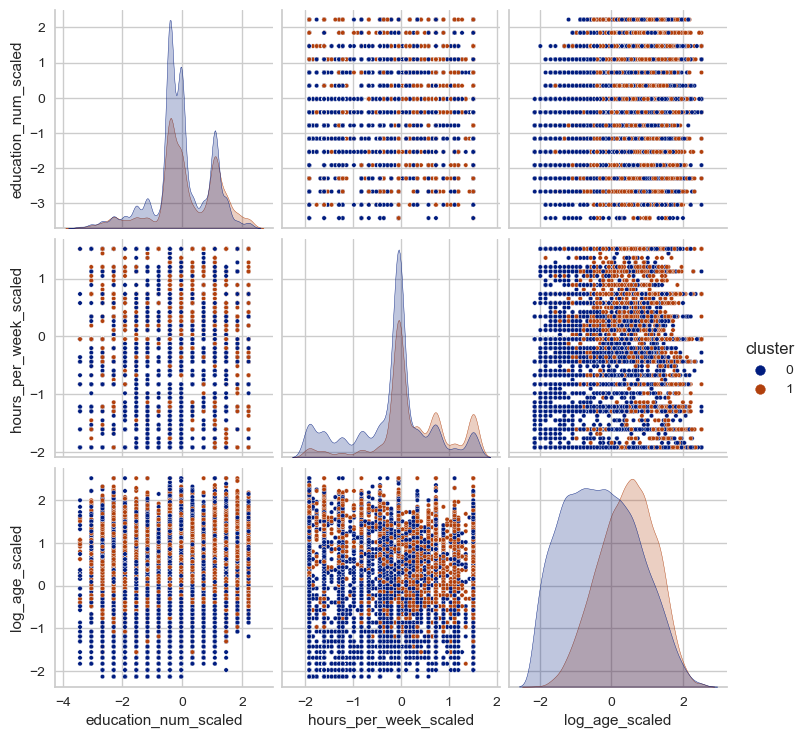

In [56]:
df = analysis_df.iloc[:, :3]
df['cluster'] = analysis_df['cluster']

# Create a pair plot with different colors for each cluster
sns.pairplot(df, hue='cluster', diag_kind='kde', palette='dark', plot_kws={'s': 10})

plt.show()


From the pair-plot graph, no clear separation between clusters was found. However, what can be clearly observed is that *hours per week for cluster 0 are mostly shorter compared to other clusters* and *younger age groups are more prevalent in cluster 0*.

To get a clear picture, I bin the numerical data into more interpretable ranges and use pie charts to visualize the data.

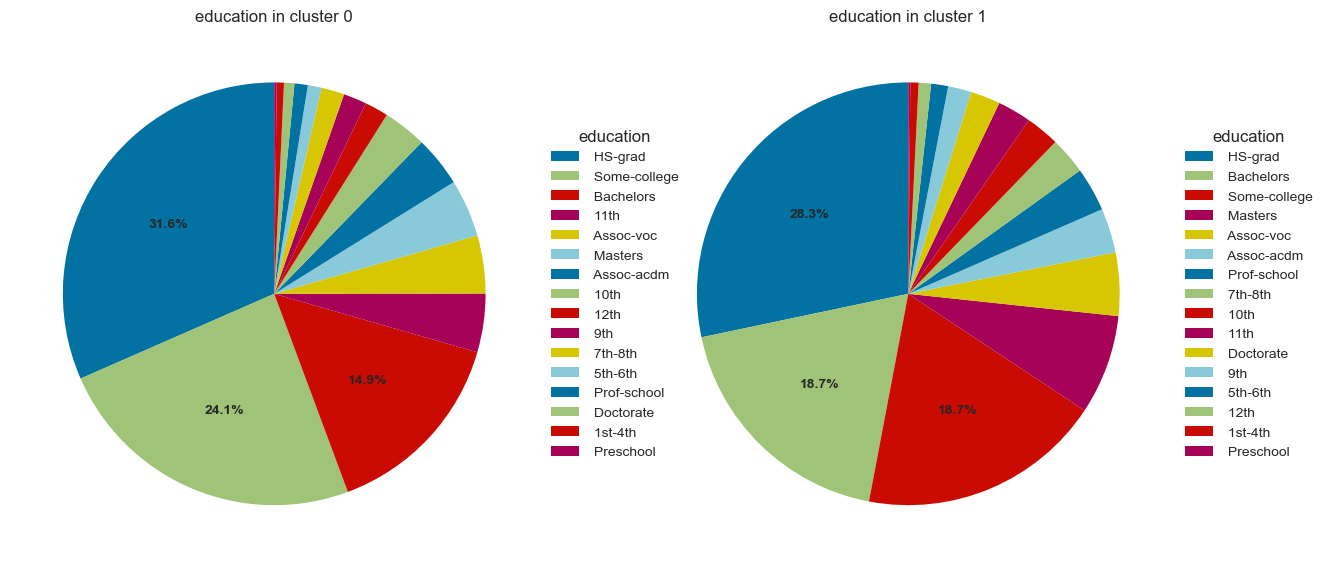

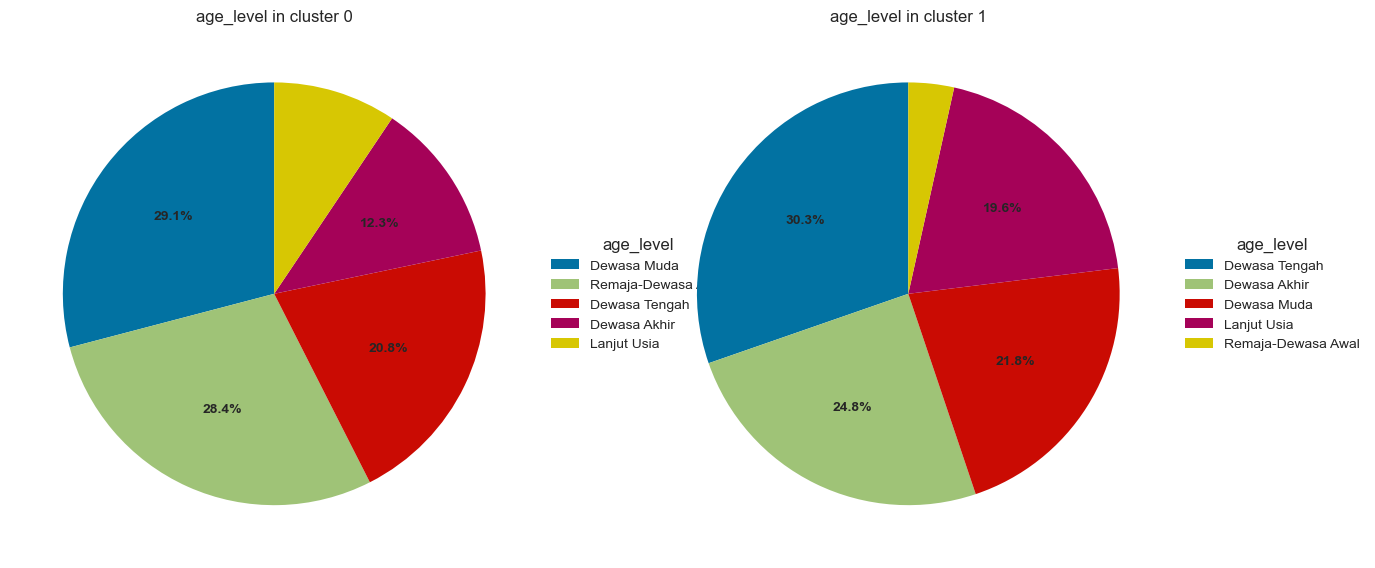

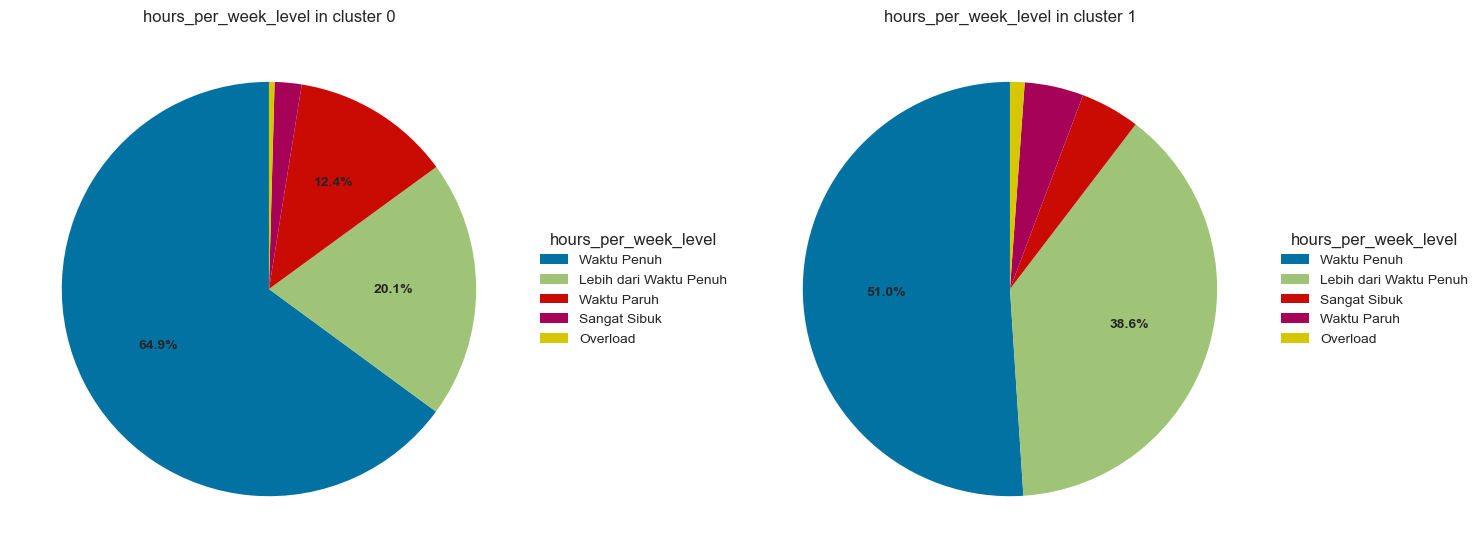

In [57]:
n_cluster = 2

# Function to show values greater than 10%
def filter_pct(pct):
    return '{:.1f}%'.format(pct) if pct > 10 else ''

for col in ['education', 'age_level', 'hours_per_week_level']:

    fig, axs = plt.subplots(1, 2, figsize=(15, 15))

    for i in range(n_cluster):
        df = analysis_df[analysis_df['cluster'] == i]
        df = (df[col].value_counts() / df.shape[0]).reset_index()
        wedges, texts, autotexts = axs[i].pie(
            df[col], 
            # labels=df.apply(lambda srs: srs['index'] if srs[col] > 0.1 else '', axis=1), 
            autopct=lambda pct: filter_pct(pct), 
            startangle=90
        )
        axs[i].legend(wedges, df['index'], title=col, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
        plt.setp(autotexts, size=10, weight="bold")
        axs[i].set_title(f'{col} in cluster {i}')
    
        

plt.tight_layout()
plt.show()

From these pie chart graphs, it can be seen that the education level (*education*) between clusters is almost similar, dominated by high school graduates (HS-grad) followed by undergraduates (Bachelors or Some-college). For cluster 0, those who attended college but did not graduate (24.1%) are more than those who graduated (14.9%), while for cluster 1, both have almost the same proportion (18.7%).

In terms of age (age_level), cluster 0 has a higher proportion of young demographics (57.5% Adolescents-Young Adults) compared to cluster 1 (25.3%).

In terms of working hours per week (hours_per_week), cluster 1 has a higher proportion of "busy" people (more than full-time) (38.6%) compared to cluster 0 (20.1%).

In [58]:
analysis_df.columns[3:5]

Index(['marital_status_ Married-civ-spouse', 'relationship_ Husband'], dtype='object')

### b. Visualize the categorical data

Visualize the categorical data using horizontal bar chart.

C:\Users\mohfi\AppData\Local\Temp\ipykernel_16288\637061601.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels([f'{x:.0%}' for x in vals])
C:\Users\mohfi\AppData\Local\Temp\ipykernel_16288\637061601.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels([f'{x:.0%}' for x in vals])
C:\Users\mohfi\AppData\Local\Temp\ipykernel_16288\637061601.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels([f'{x:.0%}' for x in vals])
C:\Users\mohfi\AppData\Local\Temp\ipykernel_16288\637061601.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels([f'{x:.0%}' for x in vals])


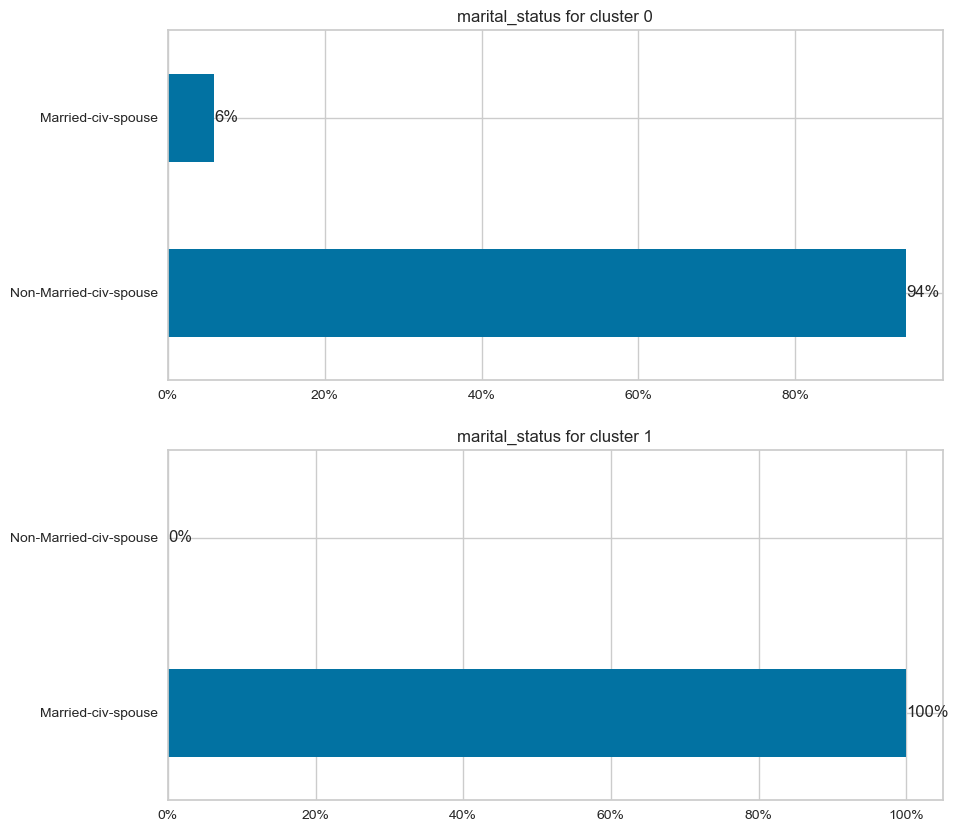

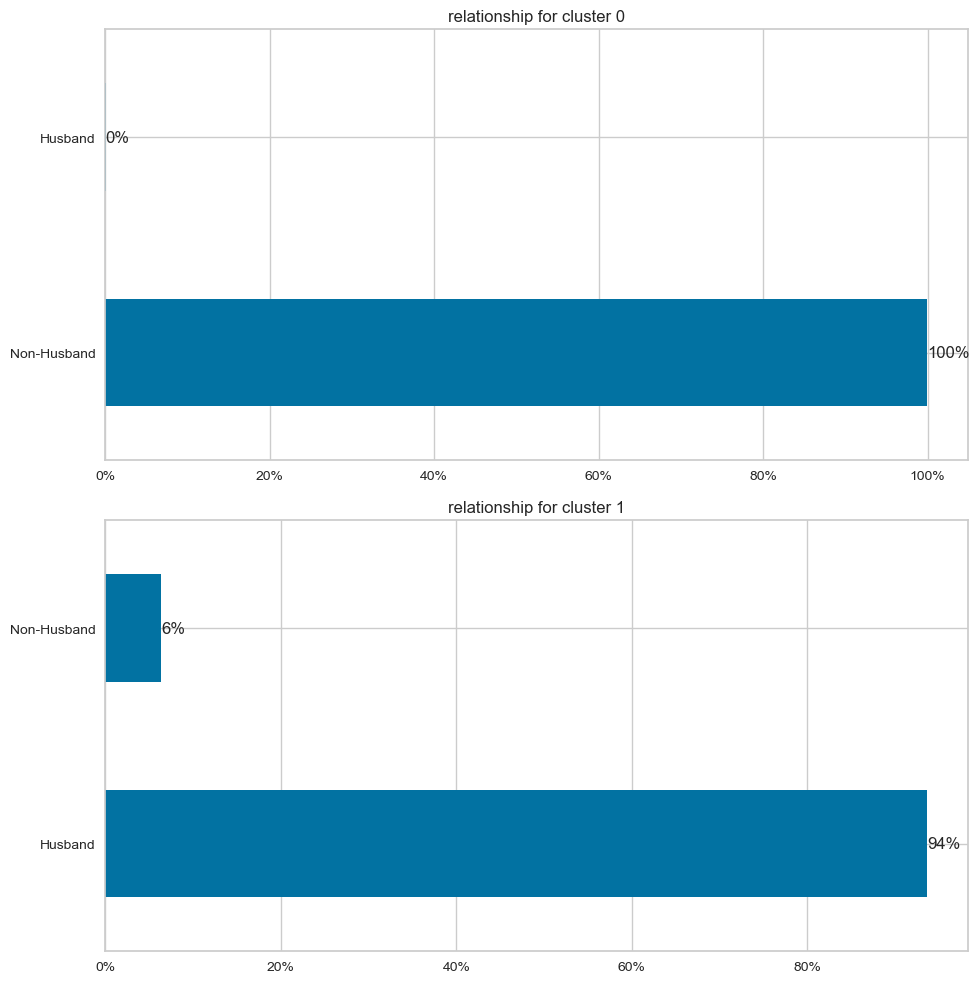

In [59]:
for j in range(3, 5):

    fig, axs = plt.subplots(2, 1, figsize=(10, 10))

    col = analysis_df.columns[j]
    feature, category = col.split('_ ')

    for i in range(2):
        df = analysis_df[analysis_df['cluster'] == i]
        df = (df[col].value_counts() / df.shape[0]).reset_index()
        
        df['index'] = df['index'].map({0: f"Non-{category}", 1: category})
        df.plot(x='index', y=col, kind='barh', ax=axs[i], legend=False)
        # Convert x-axis to percentage 
        vals = axs[i].get_xticks() 
        axs[i].set_xticklabels([f'{x:.0%}' for x in vals])
        axs[i].set_title(f'{feature} for cluster {i}')
        axs[i].set_ylabel('')
        # Add percentage labels to each bar 
        for container in axs[i].containers: 
            axs[i].bar_label(container, labels=[f'{x:.0%}' for x in container.datavalues])

plt.tight_layout()
plt.show()

Here is the summary from the categorical data visualization results:
- Cluster 0:
  - Almost all (94%) are not married to a civil partner
  - Almost all are not husbands (99%)
- Cluster 1:
  - Almost all (100%) are married to a civil partner
  - Almost all are husbands (94%)

### c. Conclusion

- **Cluster 0:** *This cluster is dominated by wives, singles, and others. They tend to be younger and less busy compared to other clusters. The majority are high school graduates or attended college, especially those who did not earn a degree.*
  - About 2/3 are high school-college graduates (but more are non-degree holders)
  - Higher proportion of young demographics (57.5%)
  - Fewer "busy" individuals (20.1%)
  - Almost all (94%) are not married to a civil partner
  - Almost all are not husbands (99%)

- **Cluster 1:** *This cluster is dominated by husbands married to civil partners. They tend to be older and busier compared to other clusters. The majority are high school or college graduates, whether degree holders or not.* 
  - About 2/3 are high school-college graduates
  - Lower proportion of young demographics (25.3%)
  - More "busy" individuals (38.6%)
  - Almost all (100%) are married to a civil partner
  - Almost all are husbands (100%)

# **7. Exporting the Data**

Saving the clustering results into a csv file.

In [60]:
analysis_df.to_csv('clustering_result.csv', index=False)

In [61]:
print("Done")

Done
